# Autoencode me

Let's use a different architecture, an autoencoder!

We will use the functional API to define the autoencoder!

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

ae_input = Input(shape=(784,))
encoder_1 = Dense(256, activation='relu')(ae_input)
encoder_2 = Dense(32, activation='relu')(encoder_1)


decoder_2 = Dense(32, activation='relu')(encoder_2)
decoder_1 = Dense(256, activation='relu')(decoder_2)
ae_output = Dense(784, activation='sigmoid')(decoder_1)


/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Build the model and a get a handler to extract the hidden representation (encoded_2). Note that the weights are shared between the two models!

In [5]:
from keras.optimizers import Adam

autoencoder = Model(ae_input, ae_output)
encoder = Model(ae_input, encoder_2)
autoencoder.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')


Get the data (as usual):

In [6]:
import keras
import numpy as np
from keras.datasets import mnist

# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0


Train the autoencoder!

In [7]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50
 - 2s - loss: 0.2188
Epoch 2/50
 - 1s - loss: 0.1350
Epoch 3/50
 - 1s - loss: 0.1197
Epoch 4/50
 - 1s - loss: 0.1125
Epoch 5/50
 - 1s - loss: 0.1072
Epoch 6/50
 - 1s - loss: 0.1037
Epoch 7/50
 - 1s - loss: 0.1013
Epoch 8/50
 - 1s - loss: 0.0993
Epoch 9/50
 - 1s - loss: 0.0974
Epoch 10/50
 - 1s - loss: 0.0957
Epoch 11/50
 - 1s - loss: 0.0943
Epoch 12/50
 - 1s - loss: 0.0931
Epoch 13/50
 - 1s - loss: 0.0921
Epoch 14/50
 - 1s - loss: 0.0912
Epoch 15/50
 - 1s - loss: 0.0905
Epoch 16/50
 - 1s - loss: 0.0898
Epoch 17/50
 - 1s - loss: 0.0891
Epoch 18/50
 - 1s - loss: 0.0886
Epoch 19/50
 - 1s - loss: 0.0880
Epoch 20/50
 - 1s - loss: 0.0875
Epoch 21/50
 - 1s - loss: 0.0871
Epoch 22/50
 - 1s - loss: 0.0866
Epoch 23/50
 - 1s - loss: 0.0862
Epoch 24/50
 - 1s - loss: 0.0858
Epoch 25/50
 - 1s - loss: 0.0854
Epoch 26/50
 - 1s - loss: 0.0850
Epoch 27/50
 - 1s - loss: 0.0847
Epoch 28/50
 - 1s - loss: 0.0844
Epoch 29/50
 - 1s - loss: 0.0842
Epoch 30/50
 - 1s - loss: 0.0839
Epoch 31/50
 - 1s -

Let's evaluate the model by reconstructing some images!

In [8]:
original_images = x_test[:10]
reconstructed_images = autoencoder.predict(original_images).reshape((-1, 28, 28))
original_images = original_images.reshape((-1, 28, 28))

Original Images:


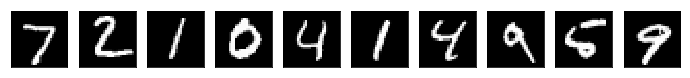

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Original Images:")
plt.figure(1, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(original_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Reconstructed Images:


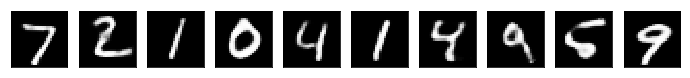

In [10]:
print("Reconstructed Images:")
plt.figure(2, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Pretty impressive, given that we compressed the data into just 32 dimensions (compression rate > 24). Note that the model performs a kind of smoothing/denoising.

We can further improve the "denoising" abilities of the model by adding noise during the training!

In [11]:
autoencoder.fit(x_train + 0.4*np.random.randn(x_train.shape[0], 784), x_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50
 - 1s - loss: 0.1259
Epoch 2/50
 - 1s - loss: 0.1096
Epoch 3/50
 - 1s - loss: 0.1064
Epoch 4/50
 - 1s - loss: 0.1046
Epoch 5/50
 - 1s - loss: 0.1034
Epoch 6/50
 - 1s - loss: 0.1024
Epoch 7/50
 - 1s - loss: 0.1017
Epoch 8/50
 - 1s - loss: 0.1011
Epoch 9/50
 - 1s - loss: 0.1005
Epoch 10/50
 - 1s - loss: 0.1001
Epoch 11/50
 - 1s - loss: 0.0997
Epoch 12/50
 - 1s - loss: 0.0994
Epoch 13/50
 - 1s - loss: 0.0990
Epoch 14/50
 - 1s - loss: 0.0987
Epoch 15/50
 - 1s - loss: 0.0985
Epoch 16/50
 - 1s - loss: 0.0982
Epoch 17/50
 - 1s - loss: 0.0980
Epoch 18/50
 - 1s - loss: 0.0978
Epoch 19/50
 - 1s - loss: 0.0976
Epoch 20/50
 - 1s - loss: 0.0974
Epoch 21/50
 - 1s - loss: 0.0973
Epoch 22/50
 - 1s - loss: 0.0971
Epoch 23/50
 - 1s - loss: 0.0969
Epoch 24/50
 - 1s - loss: 0.0968
Epoch 25/50
 - 1s - loss: 0.0967
Epoch 26/50
 - 1s - loss: 0.0966
Epoch 27/50
 - 1s - loss: 0.0964
Epoch 28/50
 - 1s - loss: 0.0963
Epoch 29/50
 - 1s - loss: 0.0962
Epoch 30/50
 - 1s - loss: 0.0961
Epoch 31/50
 - 1s -

Let's reconstruct some noisy images!

In [12]:
original_images = x_test[:10] + 0.4*np.random.randn(10, 784)
reconstructed_images = autoencoder.predict(original_images).reshape((-1, 28, 28))
original_images = original_images.reshape((-1, 28, 28))

Noisy Images:


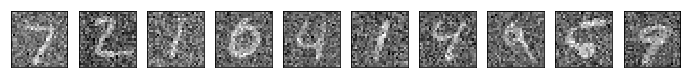

In [13]:
print("Noisy Images:")
plt.figure(1, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(original_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Reconstructed Images:


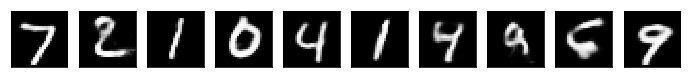

In [14]:
print("Reconstructed Images:")
plt.figure(2, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)